In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
df = pd.read_csv(r"E:\PRAXIS\TERM 1\FOML\dt\Employee_HR.csv")

In [11]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR
0,780152,3.8,5.3,2,157,3,0,0,sales,11053
1,780153,8.0,8.6,5,262,6,0,0,sales,54063
2,780154,1.1,8.8,7,272,4,0,0,sales,61300
3,780155,7.2,8.7,5,223,5,0,0,sales,20647
4,780156,3.7,5.2,2,159,3,0,0,sales,17808


In [12]:
df.tail()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR
14994,795146,4.0,5.7,2,151,3,0,0,support,37640
14995,795147,3.7,4.8,2,160,3,0,0,support,33643
14996,795148,3.7,5.3,2,143,3,0,0,support,34050
14997,795149,1.1,9.6,6,280,4,0,0,support,38375
14998,795150,3.7,5.2,2,158,3,0,0,support,34466


In [13]:


# Define features (X) and target (y)
features = [
    'Satisfaction', 'Evaluation', 'number_of_projects', 'average_montly_hours',
    'time_spent_company', 'work_accident', 'Promotion', 'Department'
]
X = df[features]
y = df['Salary_INR']

# Identify column groups for this dataset
numerical_cols = [
    'Satisfaction', 'Evaluation', 'number_of_projects',
    'average_montly_hours', 'time_spent_company'
]
categorical_cols = ['Department']

# --- Encoding ---
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# --- Splitting ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# --- Scaling ---
# Scale numerical columns only
scaler = StandardScaler()

# 1. Fit the scaler ONLY on the training data's numerical columns
scaler.fit(X_train[numerical_cols])

# 2. Transform both training and testing sets' numerical columns
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Regressor (Limit the depth to 5 to prevent initial overfitting)
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Model is trained and predictions (y_pred_dt) are generated.

In [15]:
# Calculate metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\n--- Decision Tree Evaluation (Max Depth 5) ---")
print(f"Mean Absolute Error (MAE): ${mae_dt:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_dt:,.2f}")
print(f"R-squared (R^2) Score: {r2_dt:.4f}")


--- Decision Tree Evaluation (Max Depth 5) ---
Mean Absolute Error (MAE): $40,839.38
Root Mean Squared Error (RMSE): $67,762.10
R-squared (R^2) Score: 0.0083


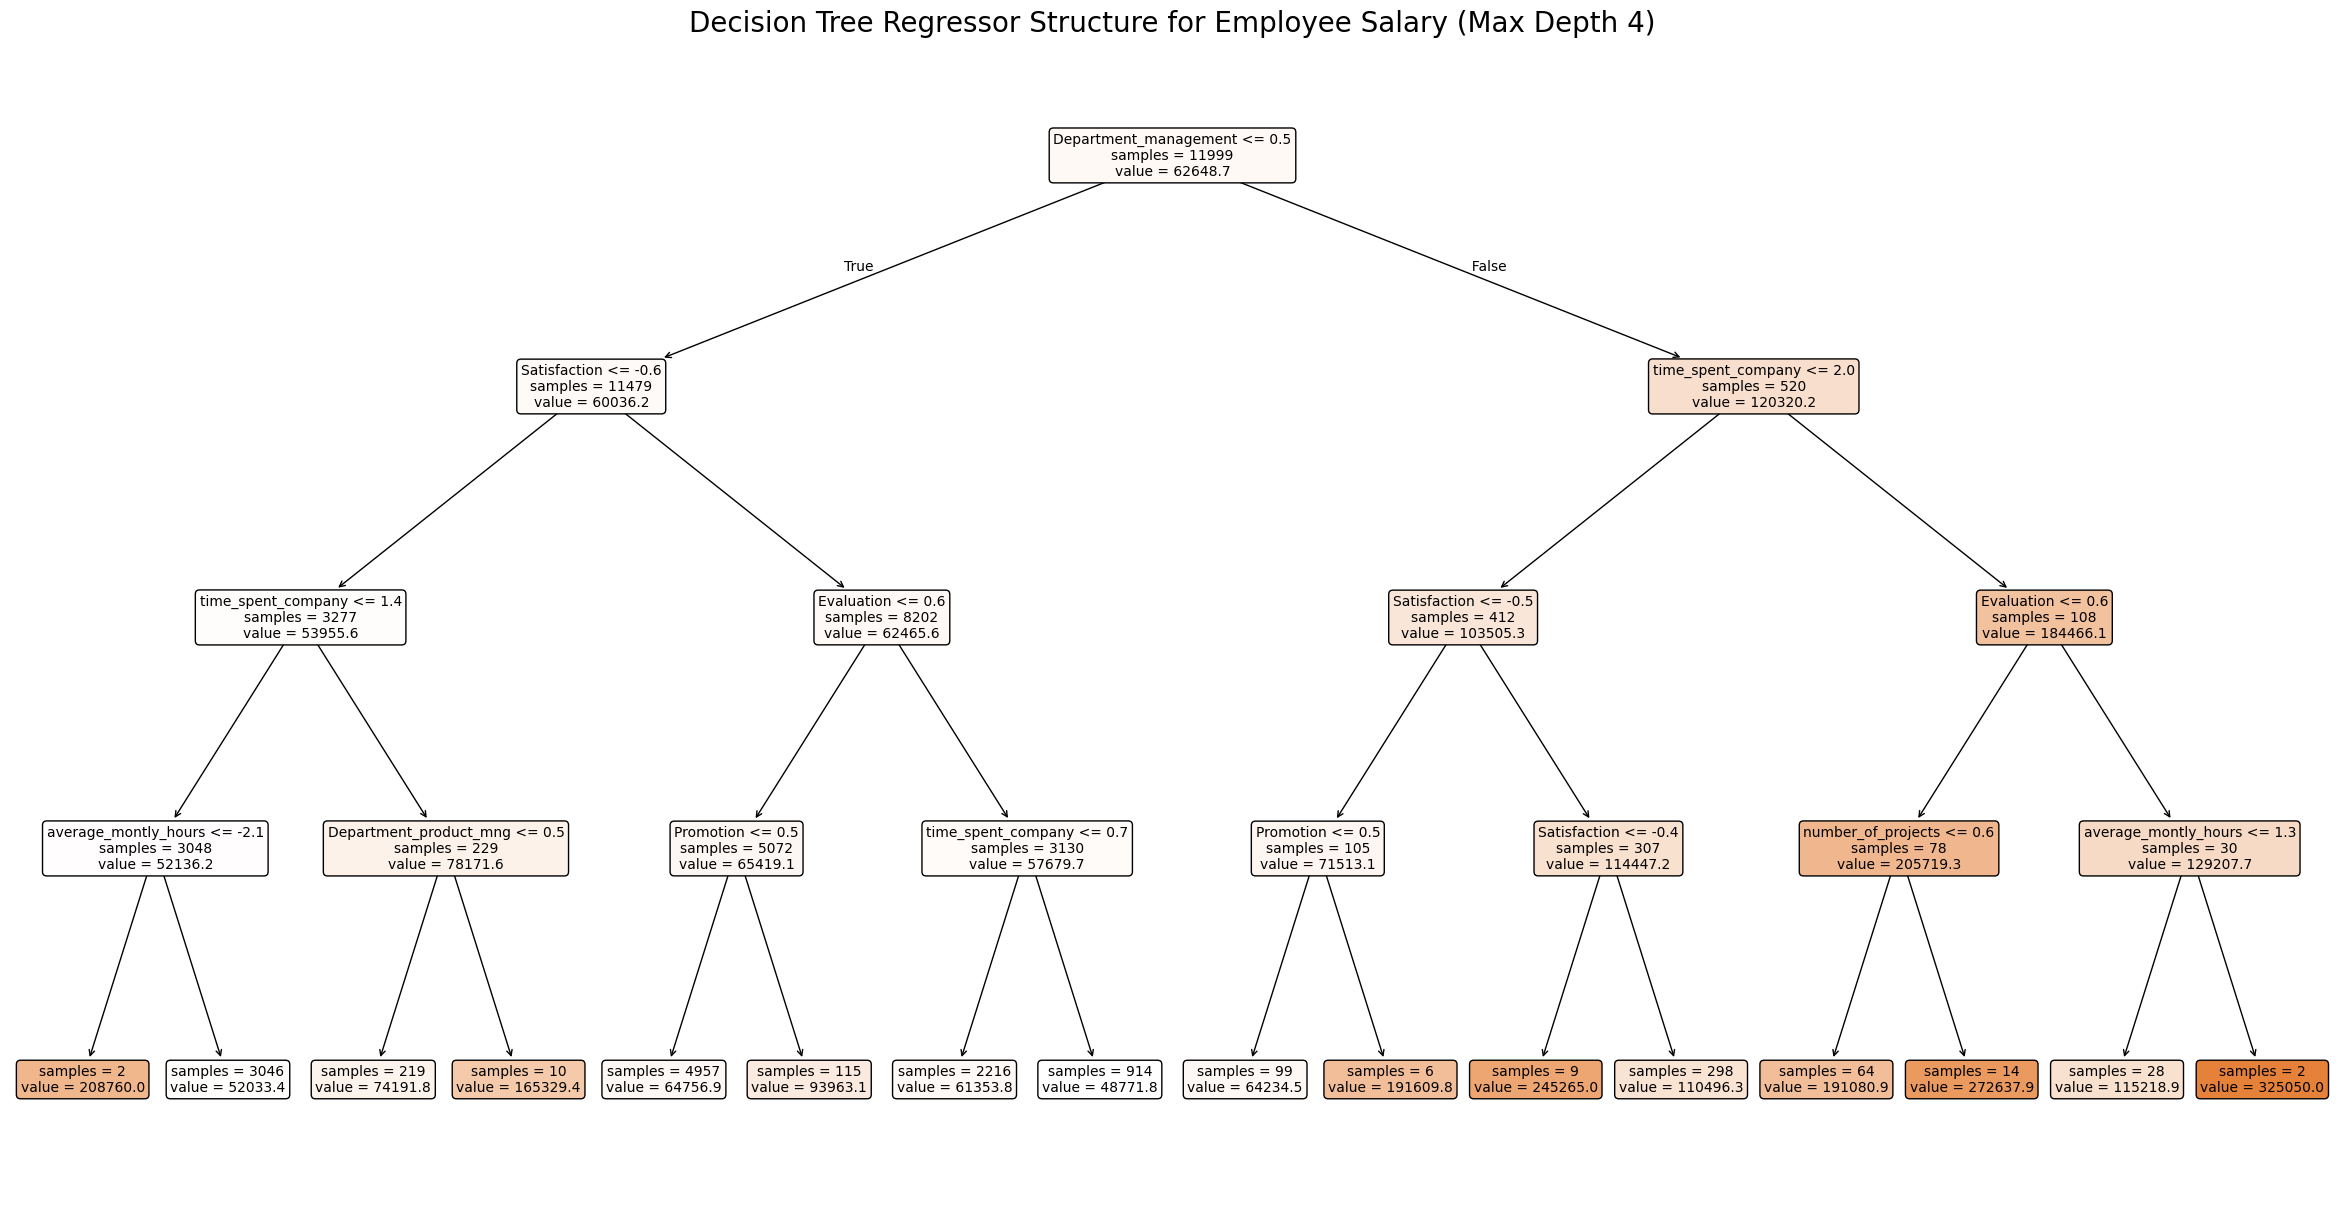

In [17]:
import pandas as pd
import matplotlib.pyplot as plt  # <-- This line is crucial for 'plt'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree



# Define features (X) and target (y)
features = [
    'Satisfaction', 'Evaluation', 'number_of_projects', 'average_montly_hours',
    'time_spent_company', 'work_accident', 'Promotion', 'Department'
]
X = df[features]
y = df['Salary_INR']

# Identify column groups
numerical_cols = [
    'Satisfaction', 'Evaluation', 'number_of_projects',
    'average_montly_hours', 'time_spent_company'
]
categorical_cols = ['Department']

# --- 2. Encoding and Feature List ---
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
feature_names = X_encoded.columns.tolist()

# --- 3. Splitting ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# --- 4. Scaling (Standardization) ---
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# --- 5. Train the Model ---
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X_train, y_train)


# --- 6. Generate and Display the Decision Tree Plot ---
plt.figure(figsize=(30, 15))

plot_tree(
    dt_regressor,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=False,
    precision=1
)

plt.title("Decision Tree Regressor Structure for Employee Salary (Max Depth 4)", fontsize=20)
plt.show()